In [1]:
import pandas as pd

# Define the two DataFrames
df1 = pd.DataFrame([['a', 1], ['b', 2]],
                   columns=['letter', 'number'])
df2 = pd.DataFrame([['c', 1], ['d', 2]],
                   columns=['letter', 'number'])

# Concatenate the DataFrames vertically (axis=0) and reset the index
# The default axis is 0, so we don't need to specify it.
df_combined = pd.concat([df1, df2], ignore_index=True)

# Print the resulting DataFrame and its index type
print("Combined DataFrame:")
print(df_combined)
print("\nIndex Type:")
print(df_combined.index)

Combined DataFrame:
  letter  number
0      a       1
1      b       2
2      c       1
3      d       2

Index Type:
RangeIndex(start=0, stop=4, step=1)


In [2]:
import pandas as pd

# Define the first DataFrame (df1)
df1_dict = {
        'id': ['1', '2', '3', '4', '5'],
        'Feature1': ['A', 'C', 'E', 'G', 'I'],
        'Feature2': ['B', 'D', 'F', 'H', 'J']}
df1 = pd.DataFrame(df1_dict, columns = ['id', 'Feature1', 'Feature2'])

# Define the second DataFrame (df2)
df2_dict = {
        'id': ['1', '2', '6', '7', '8'],
        'Feature1': ['K', 'M', 'O', 'Q', 'S'],
        'Feature2': ['L', 'N', 'P', 'R', 'T']}
df2 = pd.DataFrame(df2_dict, columns = ['id', 'Feature1', 'Feature2'])

print("--- DataFrame 1 ---")
print(df1)
print("\n--- DataFrame 2 ---")
print(df2)
print("\n" + "="*50 + "\n")

--- DataFrame 1 ---
  id Feature1 Feature2
0  1        A        B
1  2        C        D
2  3        E        F
3  4        G        H
4  5        I        J

--- DataFrame 2 ---
  id Feature1 Feature2
0  1        K        L
1  2        M        N
2  6        O        P
3  7        Q        R
4  8        S        T




In [3]:
# Inner Merge: Keeps only the intersecting IDs ('1' and '2')
df_inner = pd.merge(df1, df2, on='id', how='inner')

print("Output 1: Inner Merge")
print(df_inner)

Output 1: Inner Merge
  id Feature1_x Feature2_x Feature1_y Feature2_y
0  1          A          B          K          L
1  2          C          D          M          N


In [4]:
# Outer Merge: Keeps all IDs from both DataFrames
df_outer = pd.merge(
    df1,
    df2,
    on='id',
    how='outer',
    suffixes=('_df1', '_df2') # Set custom suffixes for clarity
)

# Replace 'nan' with 'nannan' for visual match with your example (optional step)
df_outer = df_outer.fillna('nan')

print("\nOutput 2: Full Outer Merge")
print(df_outer)


Output 2: Full Outer Merge
  id Feature1_df1 Feature2_df1 Feature1_df2 Feature2_df2
0  1            A            B            K            L
1  2            C            D            M            N
2  3            E            F          nan          nan
3  4            G            H          nan          nan
4  5            I            J          nan          nan
5  6          nan          nan            O            P
6  7          nan          nan            Q            R
7  8          nan          nan            S            T


In [5]:
import pandas as pd
import numpy as np

# generate days
all_dates = pd.date_range('2021-01-01', '2021-12-15')
business_dates = pd.bdate_range('2021-01-01', '2021-12-31')

# generate tickers
tickers = ['AAPL', 'FB', 'GE', 'AMZN', 'DAI']

# create indexs
index_alt = pd.MultiIndex.from_product([all_dates, tickers], names=['Date', 'Ticker'])
index = pd.MultiIndex.from_product([business_dates, tickers], names=['Date', 'Ticker'])

# create DFs
market_data = pd.DataFrame(index=index,
                        data=np.random.randn(len(index), 3),
                        columns=['Open','Close','Close_Adjusted'])

alternative_data = pd.DataFrame(index=index_alt,
                                data=np.random.randn(len(index_alt), 2),
                                columns=['Twitter','Reddit'])

# --- Question 1: Merge MultiIndex ---
merged_df = market_data.merge(alternative_data, 
                             how='left', 
                             left_index=True, 
                             right_index=True)

# --- Question 2: Fill Missing Values ---
filled_df = merged_df.fillna(0)

# Validation check:
validation_result = filled_df.sum().sum() == merged_df.sum().sum()

# Output the required validation results
print(f"DataFrame Shape: {merged_df.shape}")
print("\nmerged_df.head():")
print(merged_df.head().to_markdown())
print(f"\nValidation Check (Q2): {validation_result}")

DataFrame Shape: (1305, 5)

merged_df.head():
|                                            |        Open |     Close |   Close_Adjusted |   Twitter |    Reddit |
|:-------------------------------------------|------------:|----------:|-----------------:|----------:|----------:|
| (Timestamp('2021-01-01 00:00:00'), 'AAPL') |  0.00329041 | -0.756685 |        0.209348  |  0.389406 | -0.449637 |
| (Timestamp('2021-01-01 00:00:00'), 'FB')   |  0.0810698  |  0.932573 |        0.413234  | -0.986006 |  0.428245 |
| (Timestamp('2021-01-01 00:00:00'), 'GE')   |  0.0169382  | -0.94605  |       -0.0350921 | -0.964708 | -0.406702 |
| (Timestamp('2021-01-01 00:00:00'), 'AMZN') |  1.6732     |  0.669859 |       -0.483584  |  0.35342  |  1.93547  |
| (Timestamp('2021-01-01 00:00:00'), 'DAI')  | -1.14562    |  0.026994 |       -0.370305  | -1.03929  | -0.855949 |

Validation Check (Q2): True


In [6]:
import pandas as pd
import numpy as np

def winsorize(df: pd.DataFrame, quantiles: list) -> pd.DataFrame:
    """
    Applies Winsorization to all numerical columns in a DataFrame without a for loop.
    
    Args:
        df (pd.DataFrame): The DataFrame to process.
        quantiles (list): A list containing the lower and upper quantiles (e.g., [0.20, 0.80]).
        
    Returns:
        pd.DataFrame: The DataFrame with winsorized values.
    """
    if len(quantiles) != 2 or quantiles[0] >= quantiles[1]:
        raise ValueError("Quantiles must be a list of two values: [lower_q, upper_q], where lower_q < upper_q.")
    
    lower_q, upper_q = quantiles[0], quantiles[1]
    df_winsorized = df.copy()

    # 1. Select only the numerical columns to process
    numeric_df = df.select_dtypes(include=np.number)
    
    # 2. Calculate the cut-off values (bounds) across ALL numerical data.
    # We flatten the numerical data to a 1D array before calculating percentiles.
    series_data = numeric_df.values.flatten()
    
    # Use numpy.percentile to calculate the cut-off values (requires 0-100 range)
    lower_bound = np.percentile(series_data, lower_q * 100)
    upper_bound = np.percentile(series_data, upper_q * 100)
    
    # 3. Apply the clip method to the ENTIRE numerical DataFrame at once
    # This replaces the need for the loop.
    clipped_data = numeric_df.clip(lower=lower_bound, upper=upper_bound, axis=1)
    
    # 4. Update the numerical columns in the copy
    df_winsorized[numeric_df.columns] = clipped_data
        
    return df_winsorized

# --- Verification ---
df = pd.DataFrame(range(1,11), columns=['sequence'])

# Running the function:
print(winsorize(df, [0.20, 0.80]).to_markdown())

|    |   sequence |
|---:|-----------:|
|  0 |        2.8 |
|  1 |        2.8 |
|  2 |        3   |
|  3 |        4   |
|  4 |        5   |
|  5 |        6   |
|  6 |        7   |
|  7 |        8   |
|  8 |        8.2 |
|  9 |        8.2 |


In [7]:
import pandas as pd
import numpy as np

def winsorize(df: pd.DataFrame, quantiles: list) -> pd.DataFrame:
    """
    Applies Winsorization to the numerical columns of the group DataFrame.
    
    In the context of groupby, this DataFrame (df) contains the current group's data.
    """
    if len(quantiles) != 2 or quantiles[0] >= quantiles[1]:
        raise ValueError("Quantiles must be a list of two values: [lower_q, upper_q], where lower_q < upper_q.")
    
    lower_q, upper_q = quantiles[0], quantiles[1]
    
    # 1. Select the Series to winsorize (assuming only one numerical column is passed/needed)
    #    We use .iloc[:, 0] to select the first (and only) numerical column in the group's DataFrame.
    series = df.select_dtypes(include=np.number).iloc[:, 0]

    # 2. Calculate the cut-off bounds for the CURRENT GROUP ONLY
    #    We use .dropna() to compute percentiles correctly.
    lower_bound = np.percentile(series.dropna(), lower_q * 100)
    upper_bound = np.percentile(series.dropna(), upper_q * 100)
    
    # 3. Create the winsorized Series using clip
    winsorized_series = series.clip(lower=lower_bound, upper=upper_bound)
    
    # 4. Return a DataFrame with the clipped Series
    return pd.DataFrame({series.name: winsorized_series})


# --- Generate the Data Set ---
groups = np.concatenate([np.ones(10), np.ones(10)+1,  np.ones(10)+2, np.ones(10)+3, np.ones(10)+4])

df = pd.DataFrame(data= zip(groups,
                            range(1,51)),
                columns=["group", "sequence"])

# --- Apply Groupby and Winsorize ---
quantiles_to_use = [0.05, 0.95]

# FIX: Add include_groups=False to silence the FutureWarning
winsorized_df = df.groupby('group', group_keys=False).apply(
    lambda x: winsorize(x, quantiles=quantiles_to_use),
    include_groups=False # The fix from the previous step
)

# Reset index to match the requested output format
winsorized_df = winsorized_df.reset_index(drop=True)[['sequence']]

# --- Verification ---
print("Winsorized DataFrame (First Rows):")
print(winsorized_df.head(11).to_markdown())

Winsorized DataFrame (First Rows):
|    |   sequence |
|---:|-----------:|
|  0 |       1.45 |
|  1 |       2    |
|  2 |       3    |
|  3 |       4    |
|  4 |       5    |
|  5 |       6    |
|  6 |       7    |
|  7 |       8    |
|  8 |       9    |
|  9 |       9.55 |
| 10 |      11.45 |


In [8]:
import pandas as pd
import numpy as np

# --- Generate the DataFrame ---
data = {
    'value': [20.45, 22.89, 32.12, 111.22, 33.22, 100, 99.99],
    'product': ['table', 'chair', 'chair', 'mobile phone', 'table', 'mobile phone', 'table']
}
df = pd.DataFrame(data)

# --- Compute Min, Max, and Mean Price per Product ---
# 1. Group by 'product'.
# 2. Use .agg() to apply 'min', 'max', and 'mean' to the 'value' column.
# 3. Use .reset_index() to make 'product' a regular column (instead of the index).
# 4. We use .round(3) to format the output to match the expected precision.

aggregated_df = df.groupby('product')['value'].agg(['min', 'max', 'mean']).reset_index()

# Rename columns to exactly match the expected output format
aggregated_df.columns = ['product', "('value', 'min')", "('value', 'max')", "('value', 'mean')"]

# Format the numerical columns to the expected precision (rounding to 3 decimal places)
# This step is often necessary to match strict exercise outputs.
aggregated_df["('value', 'min')"] = aggregated_df["('value', 'min')"].round(2)
aggregated_df["('value', 'max')"] = aggregated_df["('value', 'max')"].round(2)
aggregated_df["('value', 'mean')"] = aggregated_df["('value', 'mean')"].round(3)

print("Aggregated Results:")
print(aggregated_df.to_markdown(index=False))

Aggregated Results:
| product      |   ('value', 'min') |   ('value', 'max') |   ('value', 'mean') |
|:-------------|-------------------:|-------------------:|--------------------:|
| chair        |              22.89 |              32.12 |              27.505 |
| mobile phone |             100    |             111.22 |             105.61  |
| table        |              20.45 |              99.99 |              51.22  |


--- Unstacked DataFrame Head ---
| Date                |   ('Prediction', 'AAPL') |   ('Prediction', 'AMZN') |   ('Prediction', 'DAI') |   ('Prediction', 'FB') |   ('Prediction', 'GE') |
|:--------------------|-------------------------:|-------------------------:|------------------------:|-----------------------:|-----------------------:|
| 2021-01-01 00:00:00 |                 0.496714 |                 1.52303  |               -0.234153 |              -0.138264 |               0.647689 |
| 2021-01-04 00:00:00 |                -0.234137 |                -0.469474 |                0.54256  |               1.57921  |               0.767435 |
| 2021-01-05 00:00:00 |                -0.463418 |                -1.91328  |               -1.72492  |              -0.46573  |               0.241962 |


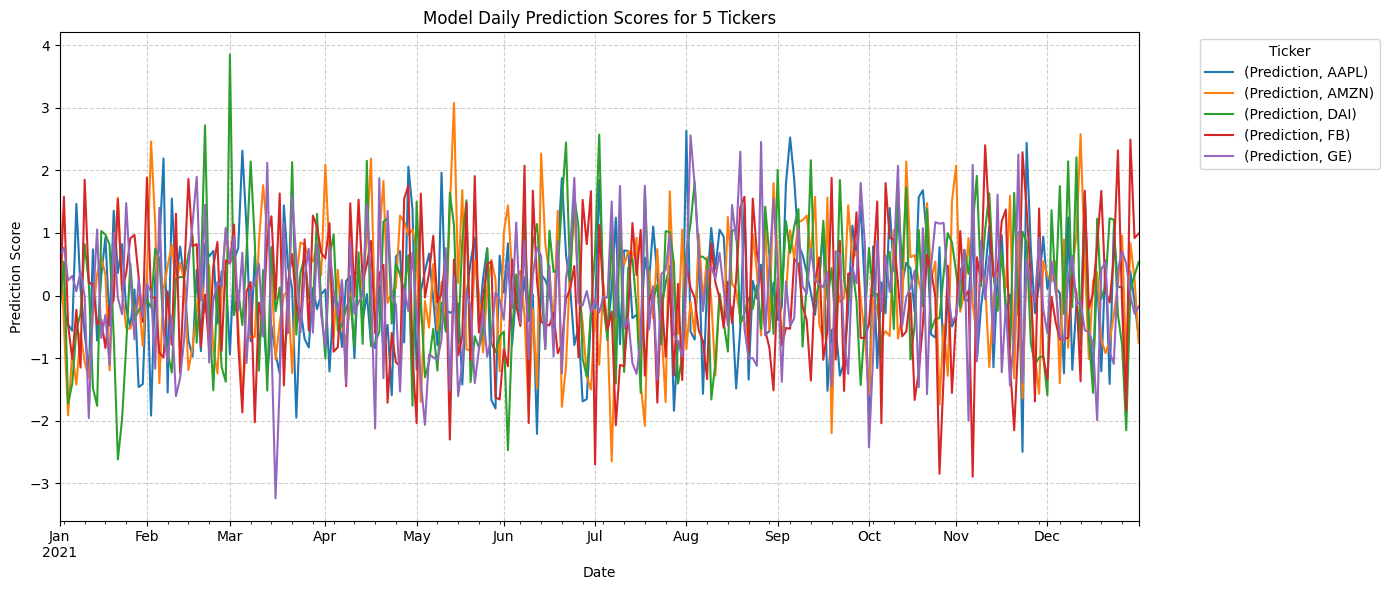

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set a seed for reproducibility of the random values
np.random.seed(42)

# --- 1. Generate the DataFrame (Provided Code) ---
business_dates = pd.bdate_range('2021-01-01', '2021-12-31')

# generate tickers
tickers = ['AAPL', 'FB', 'GE', 'AMZN', 'DAI']

# create indexs
index = pd.MultiIndex.from_product([business_dates, tickers], names=['Date', 'Ticker'])

# create DFs
market_data = pd.DataFrame(index=index,
                        data=np.random.randn(len(index), 1),
                        columns=['Prediction'])
# print(market_data.head(3).to_markdown())

# --- 2. Unstack the DataFrame ---
# Unstack by 'Ticker' moves the inner index level ('Ticker') into the columns.
# The result is a DataFrame indexed by 'Date', with columns for each Ticker's Prediction.
unstacked_df = market_data.unstack(level='Ticker')

# --- 3. Output the first 3 rows (Head) ---
print("--- Unstacked DataFrame Head ---")
print(unstacked_df.head(3).to_markdown())

# --- 4. Plot the 5 Time Series ---
# We must first address the MultiIndex columns created by unstack:
# The columns are now a MultiIndex (['Prediction', 'AAPL'], ['Prediction', 'AMZN'], etc.)
# Pandas plotting can handle this, and we use the built-in .plot() method.

plt.figure(figsize=(14, 6)) # Set a good size for the plot

unstacked_df.plot(
    ax=plt.gca(), # Use the current Axes
    title='Model Daily Prediction Scores for 5 Tickers',
    xlabel='Date',
    ylabel='Prediction Score'
)

# Move the legend outside the plot for better clarity
plt.legend(title='Ticker', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()